# Regression Machine Learning Case Study Project

><small><i>from the book 
"Machine Learning Mastery With Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End"
by Jason Brownlee, Migrated to Jupyter with additions by Mitch Sanders 2017</i></small>




How do you work through a predictive modeling machine learning problem end-to-end? In this
lesson you will work through a case study regression predictive modeling problem in Python
including each step of the applied machine learning process. After completing this project, you
will know:
- How to work through a regression predictive modeling problem end-to-end.
- How to use data transforms to improve model performance.
- How to use algorithm tuning to improve model performance.
- How to use ensemble methods and tuning of ensemble methods to improve model performance.

Let’s get started.

## Problem Definition
For this project we will investigate the Boston House Price dataset. Each record in the database
describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan
Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the UCI
Machine Learning Repository):

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 US Dollars
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in 1000's US Dollars

We can see that the input attributes have a mixture of units.

https://archive.ics.uci.edu/ml/datasets/Housing

## Load the Dataset

Let’s start off by loading the libraries required for this project.


In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


We can now load the dataset that you can download from the UCI Machine Learning
repository website.

In [3]:
# Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)


You can see that we are specifying the short names for each attribute so that we can reference
them clearly later. You can also see that attributes are delimited by whitespace rather than
commas in this file and we indicate this to read csv() function via the delim whitespace
argument. We now have our data loaded.
## Analyze Data
We can now take a closer look at our loaded data.
### Descriptive Statistics
Let’s start off by confirming the dimensions of the dataset, e.g. the number of rows and columns

In [4]:
# shape
print(dataset.shape)

(506, 14)


We have 506 instances to work with and can confirm the data has 14 attributes including
the output attribute MEDV.

Let’s also look at the data types of each attribute.

In [5]:
# types
print(dataset.dtypes)


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


We can see that all of the attributes are numeric, mostly real values (float) and some have
been interpreted as integers (int).

Let’s now take a peek at the first 20 rows of the data.


In [6]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

We can confirm that the scales for the attributes are all over the place because of the differing
units. We may benefit from some transforms later on.

Let’s summarize the distribution of each attribute.


In [7]:
# descriptions
set_option('precision', 1)
print(dataset.describe())


          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


We now have a better feeling for how different the attributes are. The min and max values
as well are the means vary a lot. We are likely going to get better results by rescaling the data
in some way.

Now, let’s now take a look at the correlation between all of the numeric attributes.


In [9]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

This is interesting. We can see that many of the attributes have a strong correlation (e.g.
greater than 0.70 or less than −0.70). For example:
- NOX and INDUS with 0.77.
- DIS and INDUS with -0.71.
- TAX and INDUS with 0.72.
- AGE and NOX with 0.73.
- DIS and NOX with -0.78.

It also looks like LSTAT has a good negative correlation with the output variable MEDV with
a value of -0.74.


## Data Visualizations
### Unimodal Data Visualizations
Let’s look at visualizations of individual attributes. It is often useful to look at your data
using multiple different visualizations in order to spark ideas. Let’s look at histograms of each
attribute to get a sense of the data distributions.

We can see that some attributes may have an exponential distribution, such as CRIM, ZN,
AGE and B. We can see that others may have a bimodal distribution such as RAD and TAX.


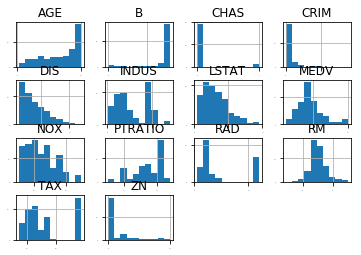

In [10]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Let’s look at the same distributions using density plots that smooth them out a bit.

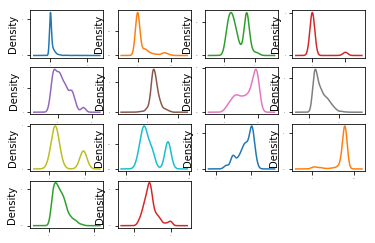

In [11]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()


This perhaps adds more evidence to our suspicion about possible exponential and bimodal
distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which
might be helpful later with transforms.

Let’s look at the data with box and whisker plots of each attribute.


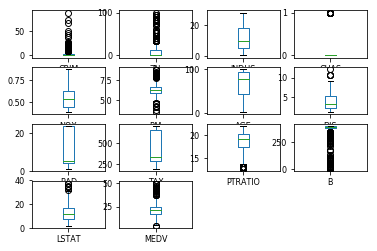

In [13]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()


### Multimodal Data Visualizations
Let’s look at some visualizations of the interactions between variables. The best place to start
is a scatter plot matrix.

We can see that some of the higher correlated attributes do show good structure in their
relationship. Not linear, but nice predictable curved relationships.

C:\Users\mitch_sanders\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


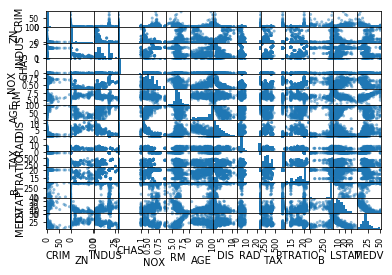

In [14]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()


We can see that some of the higher correlated attributes do show good structure in their
relationship. Not linear, but nice predictable curved relationships.

Let’s also visualize the correlations between the attributes.


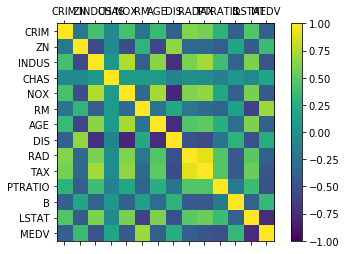

In [33]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

#A = np.arange(0,100).reshape(10,10)
#plt.matshow(A)                        # defaults
#plt.matshow(A, vmin=0, vmax=99)       # same
#plt.matshow(A, vmin=10, vmax=90)  

Object `matshow` not found.


The (light yellow) dark red color shows positive correlation whereas the dark blue (purple) color shows negative
correlation. We can also see some dark red and dark blue that suggest candidates for removal
to better improve accuracy of models later on.

### Summary of Ideas
There is a lot of structure in this dataset. We need to think about transforms that we could use
later to better expose the structure which in turn may improve modeling accuracy. So far it
would be worth trying:
- Feature selection and removing the most correlated attributes.
- Normalizing the dataset to reduce the effect of differing scales.
- Standardizing the dataset to reduce the effects of differing distributions.

With lots of additional time I would also explore the possibility of binning (discretization)
of the data. This can often improve accuracy for decision tree algorithms.

## Validation Dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80 percent
of the dataset
for modeling and hold back 20 percent for validation.

In [34]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


## Evaluate Algorithms: Baseline
We have no idea what algorithms will do well on this problem. Gut feel suggests regression
algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision
trees and even SVM may do well. I have no idea. Let’s design our test harness. We will use
10-fold cross-validation. The dataset is not too small and this is a good standard test harness
configuration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE
will give a gross idea of how wrong all predictions are (0 is perfect).

In [35]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this regression
problem. The six algorithms selected include:
- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
- Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [36]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


The algorithms all use default tuning parameters. Let’s compare the algorithms. We will
display the mean and standard deviation of MSE for each algorithm as we calculate it and
collect the results for use later.


In [37]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -23.832332 (12.176560)
SVR: -85.518342 (31.994798)


It looks like LR has the lowest MSE, followed closely by CART.

Let’s take a look at the distribution of scores across all cross-validation folds by algorithm.


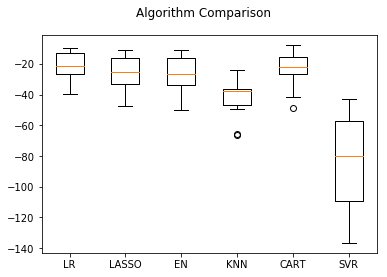

In [38]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


We can see similar distributions for the regression algorithms and perhaps a tighter distribution
of scores for CART.

The differing scales of the data is probably hurting the skill of all of the algorithms and
perhaps more so for SVR and KNN. In the next section we will look at running the same
algorithms using a standardized copy of the data

## Evaluate Algorithms: Standardization
We suspect that the differing scales of the raw data may be negatively impacting the skill of
some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of
zero and a standard deviation of 1. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross-validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [41]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -23.228400 (12.581260)
ScaledSVR: -29.633086 (17.009186)


Running the example provides a list of mean squared errors. We can see that scaling did
have an effect on KNN, driving the error lower than the other models.

Let’s take a look at the distribution of the scores across the cross-validation folds.


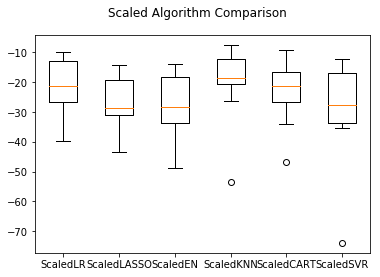

In [40]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


We can see that KNN has both a tight distribution of error and has the lowest score.

## Improve Results With Tuning
We know from the results in the previous section that KNN achieves good results on a scaled
version of the dataset. But can it do better. The default value for the number of neighbors in
KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if
we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary
range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold
cross-validation on a standardized copy of the training dataset.

In [42]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


We can display the mean and standard deviation scores as well as the best performing value
for k below.

In [43]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


You can see that the best for k (n neighbors) is 3 providing a mean squared error of
-18.172137, the best so far.

## Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross-validation and pipelines that
standardize the training data for each fold.

In [44]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledAB: -15.001855 (7.468572)
ScaledGBM: -10.173983 (4.573300)
ScaledRF: -14.496504 (8.815064)
ScaledET: -11.504415 (6.698660)


Running the example calculates the mean squared error for each method using the default
parameters. We can see that we’re generally getting better scores than our linear and nonlinear
algorithms in previous sections.

We can also plot the distribution of scores across the cross-validation folds.


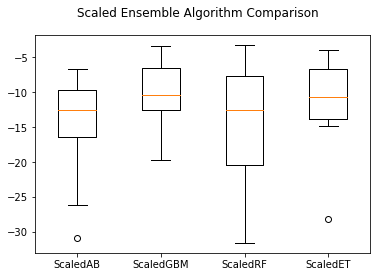

In [45]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a
similar distribution and perhaps a better median score.

We can probably do better, given that the ensemble techniques used the default parameters.
In the next section we will look at tuning the Gradient Boosting to further lift the performance.


## Tune Ensemble Methods
The default number of boosting stages to perform **(n estimators)** is 100. This is a good
candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting
stages, the better the performance but the longer the training time. In this section we will
look at tuning the number of stages for gradient boosting. Below we define a parameter grid
n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold
cross-validation.


In [46]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


As before, we can summarize the best configuration and get an idea of how performance
changed with each different configuration.

In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


We can see that the best configuration was n estimators=400 resulting in a mean squared
error of -9.356471, about 0.65 units better than the untuned method.

Next we can finalize the model and prepare it for general use.

## Finalize Model
In this section we will finalize the gradient boosting model and evaluate it on our hold out
validation dataset. First we need to prepare the model and train it on the entire training dataset.
This includes standardizing the training dataset before training.


In [48]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [49]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


11.8752520792


We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3.

<hr>

### Summary
In this chapter you worked through a regression predictive modeling machine learning problem
from end-to-end using Python. Specifically, the steps covered were:
- Problem Definition (Boston house price data).
- Loading the Datase.
- Analyze Data (some skewed distributions and correlated attributes).
- Evaluate Algorithms (Linear Regression looked good).
- Evaluate Algorithms with Standardization (KNN looked good).
- Algorithm Tuning (K=3 for KNN was best).
- Ensemble Methods (Bagging and Boosting, Gradient Boosting looked good).
- Tuning Ensemble Methods (getting the most from Gradient Boosting).
- Finalize Model (use all training data and confirm using validation dataset).

Working through this case study showed you how the recipes for specific machine learning
tasks can be pulled together into a complete project. Working through this case study is good
practice at applied machine learning using Python and scikit-learn.

### Next Step
You have now completed two predictive modeling machine learning projects end-to-end. The
first was a multiclass classification problem and this second project was a regression problem.
Next is the third and final case study on a binary classification problem.

<hr>

### About the Boston House Price dataset:
Maintained at UCI machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/housing

Included in scikit-learn datasets module
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


#### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 US Dollars
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in 1000's US Dollars


In [ ]:
# demo using Boston Housing data in SciKit-learn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)